**The goal of this kernel is to analyze the dataset AirBNB of Seattle. It contains information about the places which are able to rent and also about the hosts who are taking care of them.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
pd.set_option('display.max_columns', 500)
sns.set_style('darkgrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['listings.csv', 'calendar.csv', 'reviews.csv']


Later on I will take care about only the **listings** and **calendar**. Review are for the further analysis.

File **listings** contains information about places able to rent. One observation is per every unique listing on AIRBNB. We've got 3818 unique listings.

On the other hand file **calendar** has 1 393 570 observations which means there is data for every listing for every day - 365*3818 = 1 393 570

In [2]:
df1 = pd.read_csv("../input/listings.csv")
df2 = pd.read_csv("../input/calendar.csv")
df3 = pd.read_csv("../input/reviews.csv")

In [3]:
df1.head(3)

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   

                                      xl_picture_url   host_id  \
0                                                NaN    956883   
1  https://a0.muscache.com/ac/pictures/14409893/f...   5177328   
2                                                NaN  16708587   

                                     host_url host_name  host_since  \
0    https://www.airbnb.com/users/show/956883     Maija  2011-08-11   
1   https://www.airbnb.com/users/show/5177328    Andrea  2013-02-21   
2  https://www.airbnb.com/users/show/16708587      Jill  2014-06-12   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   
2  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   
2  i love living in Seattle.  i grew up in the mi...  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   
2                67%                 100%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.c

In [4]:
drop = ['listing_url','scrape_id','last_scraped','name','summary', 'space', 'description',
        'experiences_offered','neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url',
        'picture_url', 'xl_picture_url', 'host_url', 'host_about', 'host_thumbnail_url',
        'host_picture_url', 'street', 'license', 'host_name', 'host_location',
        'host_neighbourhood', 'neighbourhood','neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
        'market', 'experiences_offered', 'smart_location', 'host_acceptance_rate', 'country',
        'country_code', 'has_availability', 'calendar_last_scraped', 'requires_license',
        'jurisdiction_names', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
        'cleaning_fee', 'host_listings_count']
df = df1.drop(columns=drop) 

There are a lot of columns which I'm not going to use so I'm just gonna drop them. Most of them are text values, however a few of them are dropped beacuse of reasons posted below.

1. experiences_offered = 1 category
2. host_acceptance_rate = 2 categories
3. smart_location = 1 category
4. has_availability = only true category
5. calendar_last_scraped = only one date
6. requires_license = only false category
7. jurisdiction_names = only WASHINGTON
8. square_feet = too much NaN
9. weekly_price = too much NaN
10. montly_price = too much NaN
11. security_deposit = too much NaN
12. cleaning_fee = too much NaN
13. host_listings_count = correlation 1 with total listings

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 47 columns):
id                                  3818 non-null int64
host_id                             3818 non-null int64
host_since                          3816 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_is_superhost                   3816 non-null object
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
is_location_exact                   3818 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3

In [6]:
df.head(2)

id  host_id  host_since  host_response_time host_response_rate  \
0  241032   956883  2011-08-11  within a few hours                96%   
1  953595  5177328  2013-02-21      within an hour                98%   

  host_is_superhost  host_total_listings_count  \
0                 f                        3.0   
1                 t                        6.0   

                                  host_verifications host_has_profile_pic  \
0               ['email', 'phone', 'reviews', 'kba']                    t   
1  ['email', 'phone', 'facebook', 'linkedin', 're...                    t   

  host_identity_verified   latitude   longitude is_location_exact  \
0                      t  47.636289 -122.371025                 t   
1                      t  47.639123 -122.365666                 t   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4        1.0       1.0   1.0   
1     Apartment  Entire home/apt             4        1.0       1.0   1.0   

   bed_type                                          amenities    price  \
0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   $85.00   
1  Real Bed  {TV,Internet,"Wireless Internet",Kitchen,"Free...  $150.00   

   guests_included extra_people  minimum_nights  maximum_nights  \
0                2        $5.00               1             365   
1                1        $0.00               2              90   

  calendar_updated  availability_30  availability_60  availability_90  \
0      4 weeks ago               14               41               71   
1            today               13               13               16   

   availability_365  number_of_reviews first_review last_review  \
0               346                207   2011-11-01  2016-01-02   
1               291                 43   2013-08-19  2015-12-29   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  95.0                    10.0                       10.0   
1                  96.0                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                     9.0   
1                   10.0                         10.0                    10.0   

   review_scores_value instant_bookable cancellation_policy  \
0                 10.0                f            moderate   
1                 10.0                f              strict   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             t                                t   

   calculated_host_listings_count  reviews_per_month  
0                               2               4.07  
1                               6               1.48

In [7]:
def correct_number(df_value):
        try:
            value = float(df_value[1:])
        
        except ValueError:
            value = np.NaN
        except TypeError:
            value = np.NaN
        return value
    
def correct_number1(df_value):
        try:
            value = float(df_value[:-1])
        
        except TypeError:
            value = np.NaN
        return value

Before moving on there is a little bit of feature engineering. 

In [8]:
df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')
df['first_review'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d')
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

df['host_verifications_count'] = df['host_verifications'].apply(lambda x: x.count(' ') + 1)
df['amenities_count'] = df['amenities'].apply(lambda x: x.count(' ') + 1) 
df['property_type_new'] = df['property_type'] .replace(['Cabin', 'Camper/RV', 'Bungalow'], 'Category 1')
df['property_type_new'] = df['property_type_new'] .replace(['Condominium', 'Townhouse', 'Loft', 'Bed & Breakfast'], 'Category 2')
df['bed_type_new'] = df['bed_type'].replace(['Futon',' Pull-out Sofa', 'Airbed', 'Couch'], 'Other')

df['price_normal'] = df['price'].apply(correct_number)
df['extra_people_normal'] = df['extra_people'].apply(correct_number)
df['host_response_rate_normal'] = df['host_response_rate'].apply(correct_number1)

df = df.drop(columns=['host_verifications', 'amenities', 'property_type', 
                      'bed_type', 'extra_people', 'host_response_rate'])

df2['price_calendar'] = df2['price'].apply(correct_number)

In [9]:
object_c = df.select_dtypes(include='object')
numeric_c = df.select_dtypes(include='number')
for c in object_c.columns:
    l = len(object_c[c][object_c[c].notnull()].unique())
    print('Column {} has {} unique values'.format(c, l))
print('\n'*3,'NUMERIC')
for n in numeric_c.columns:
    print('Column', n)

Column host_response_time has 4 unique values
Column host_is_superhost has 2 unique values
Column host_has_profile_pic has 2 unique values
Column host_identity_verified has 2 unique values
Column is_location_exact has 2 unique values
Column room_type has 3 unique values
Column price has 273 unique values
Column calendar_updated has 34 unique values
Column instant_bookable has 2 unique values
Column cancellation_policy has 3 unique values
Column require_guest_profile_picture has 2 unique values
Column require_guest_phone_verification has 2 unique values
Column property_type_new has 11 unique values
Column bed_type_new has 3 unique values



 NUMERIC
Column id
Column host_id
Column host_total_listings_count
Column latitude
Column longitude
Column accommodates
Column bathrooms
Column bedrooms
Column beds
Column guests_included
Column minimum_nights
Column maximum_nights
Column availability_30
Column availability_60
Column availability_90
Column availability_365
Column number_of_reviews
Co

In [10]:
print(df.isnull().sum().sort_values(ascending=False))
df.isnull().any(axis=1).value_counts()

review_scores_accuracy              658
review_scores_checkin               658
review_scores_value                 656
review_scores_location              655
review_scores_cleanliness           653
review_scores_communication         651
review_scores_rating                647
first_review                        627
last_review                         627
reviews_per_month                   627
host_response_rate_normal           523
host_response_time                  523
bathrooms                            16
bedrooms                              6
host_identity_verified                2
host_has_profile_pic                  2
host_total_listings_count             2
host_is_superhost                     2
host_since                            2
beds                                  1
property_type_new                     1
price_normal                          1
room_type                             0
accommodates                          0
host_id                               0


False    2834
True      984
dtype: int64

Here we've got a problem. There are missing values mostly in review scorings and host response time. At the beggining I thought that those lacks of data are correlated with each observation and corresponds to time of being host(new hosts have not reviews yet) but if I would like to drop every missing data there would be 984 observations to drop instead of 650~. That's 25% of the data so I'm not going to drop them but also not going to fill with any kind of method.

**The very first look**

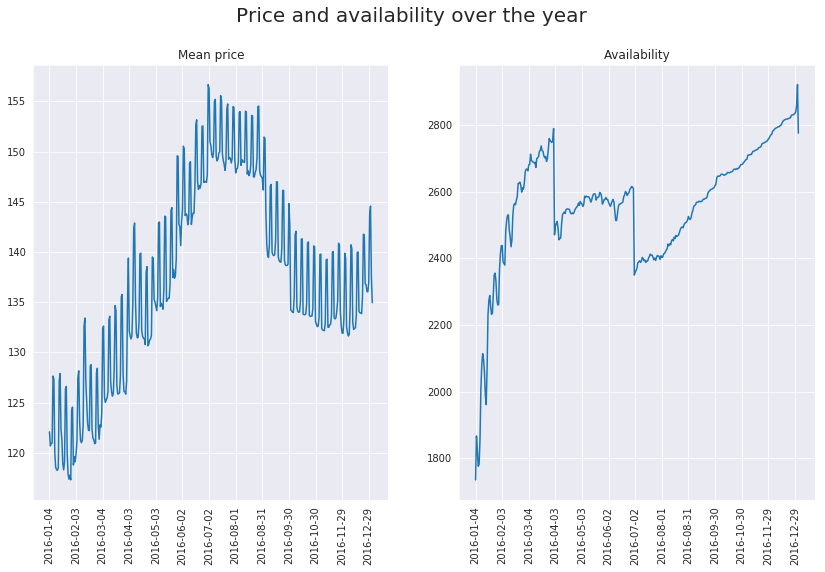

In [11]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(14,8))
g = df2['price_calendar'].groupby(df2['date']).mean()
h = df2['available'][df2['available'] == 't'].groupby(df2['date']).count()
ax1.plot(g)
ax1.set_xticks(g.index[::30])
ax1.tick_params('x', labelrotation=90)
ax2.plot(h)
ax2.set_xticks(h.index[::30])
ax2.tick_params('x', labelrotation=90)
f.suptitle('Price and availability over the year', fontsize=20)
ax1.set_title('Mean price')
ax2.set_title('Availability')
plt.show()

Text(0.5, 1.0, 'Host involvement')

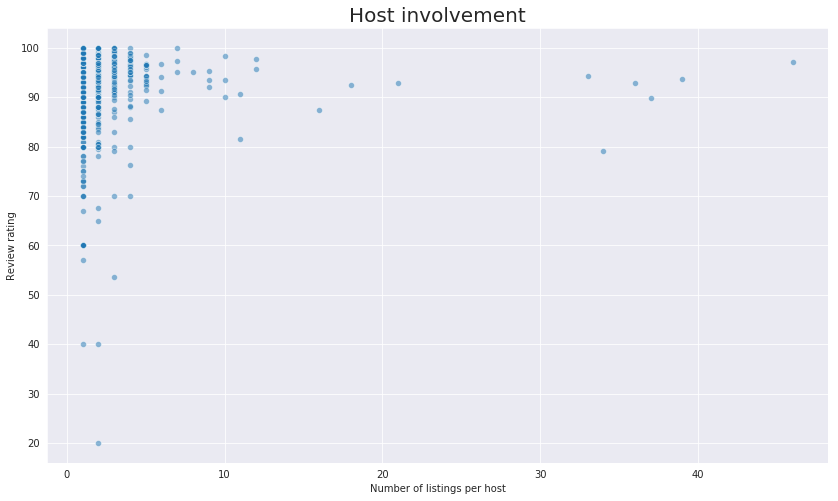

In [12]:
a = df['host_id'].value_counts().reset_index()
a.rename(columns={'index': 'host_id', 'host_id': 'num_of_listings'}, inplace=True)
b = df['review_scores_rating'].groupby(df['host_id']).mean().reset_index()
c = a.merge(b, how='left', on='host_id')
#c = c[['index', 'review_scores_rating']]
c.sort_values(by='num_of_listings', ascending=False).head(10)

plt.figure(figsize=(14,8))
sns.scatterplot(x=c['num_of_listings'],y=c['review_scores_rating'], alpha=0.5)
plt.ylabel('Review rating')
plt.xlabel('Number of listings per host')
plt.title('Host involvement', fontsize=20)

* The problem with the 1st graph is that the mean price is only counted from the listings that are available on specific date. That means at the beginning of the year mean is from less than 1800 observations while at the very end of the year there about 2900 observations which are included in mean price.
* Beside that there is seasonality in price series with peak in a summer time.
* If we talk about availabiity during year there is strange situation in the winter time. In January we've got less than 1800 listings available, however in December the same year there is almost 3000 listings which are able to be rent. Was January some kind of special time that year?
* Most of the hosts have less than 5 places to take care off. However there are people who I'm pretty sure are taking it to real business with record of 46 listings. Even though they stay at the top of mean review ratings.

**MAPS**

Maps below are interactive and represents prices and density in geographical locations over the city of Seattle. 

In [13]:
map_hooray = folium.Map(location=[47.60, -122.24], zoom_start = 11) 

for i in range(0, df.shape[0]):
    folium.Circle(
    location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
    popup=df.iloc[i]['price'],
    radius=df.iloc[i]['price_normal']/3,
    color='red',
    fill=True,
    fill_color='black').add_to(map_hooray)


map_hooray


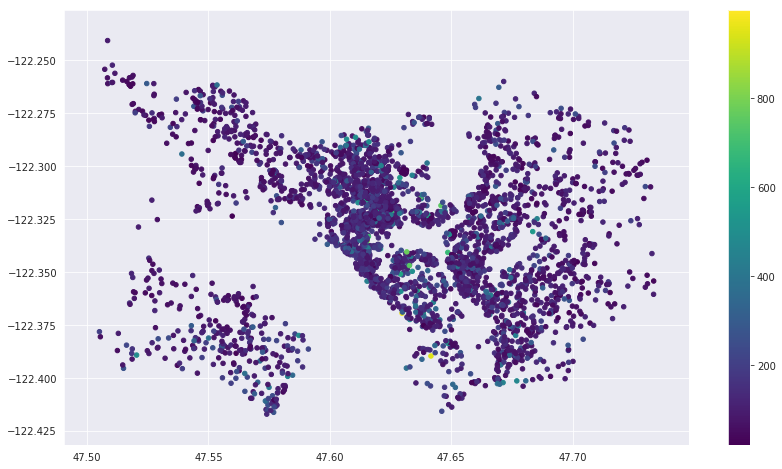

In [14]:

#points = sns.scatterplot('latitude', 'longitude', data=df1, hue='price_normal')
df_high = df[df['price_normal'] > 400]
plt.figure(figsize=(14,8))
points = plt.scatter(df['latitude'], df['longitude'], c=df["price_normal"], s=20, cmap="viridis") #set style options
#add a color bar
plt.colorbar(points)


In [15]:
map_hooray = folium.Map(location=[47.60, -122.24], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             df[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data).add_to(map_hooray)

map_hooray

Highest prices can be found in the centre of the city, aswell as density there of AirBNB houses is higher than in the coastline.

**Hosts and listings**

In [16]:
def cross(c1,c2, xlabel, title):
    p = pd.crosstab(df[c1], df[c2])
    p.plot.bar(stacked=True, figsize=(14,8))
    plt.xlabel(xlabel)
    plt.suptitle(title, fontsize=20)
    plt.show()

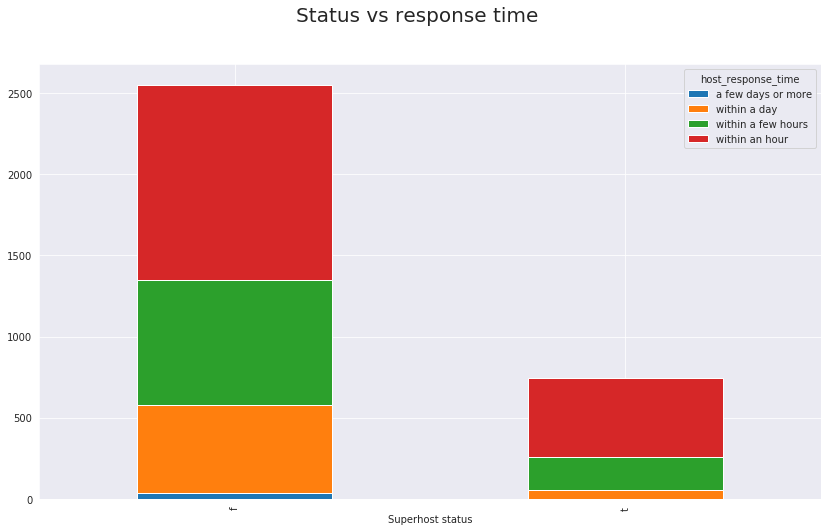

In [17]:
cross('host_is_superhost', 'host_response_time', 'Superhost status', 'Status vs response time')

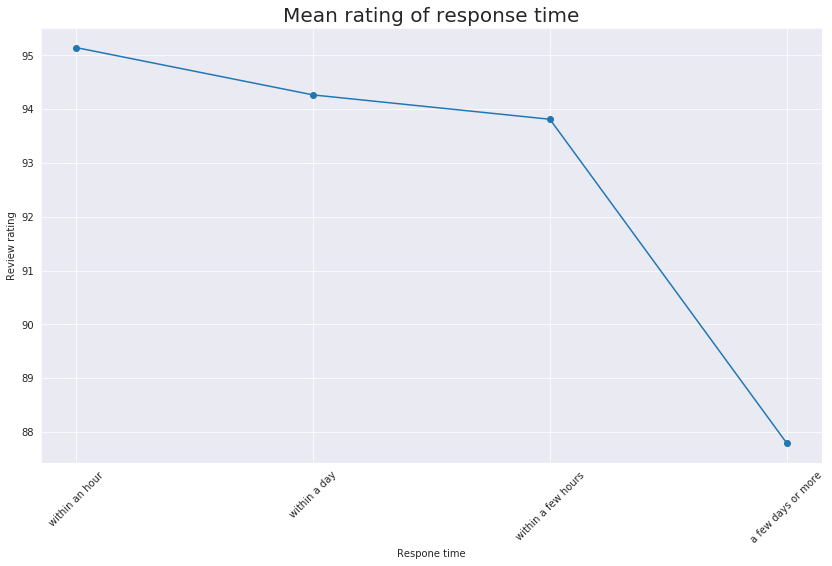

In [18]:
d = df['review_scores_rating'].groupby(df['host_response_time']).mean()
d = d.sort_values(ascending=False)
f, ax = plt.subplots(1,1, figsize=(14,8))
ax.plot(d, 'o-')
ax.set_xticklabels(d.index)
ax.tick_params('x', labelrotation=45)
plt.ylabel('Review rating')
plt.xlabel('Respone time')
plt.title('Mean rating of response time', fontsize=20)
plt.show()

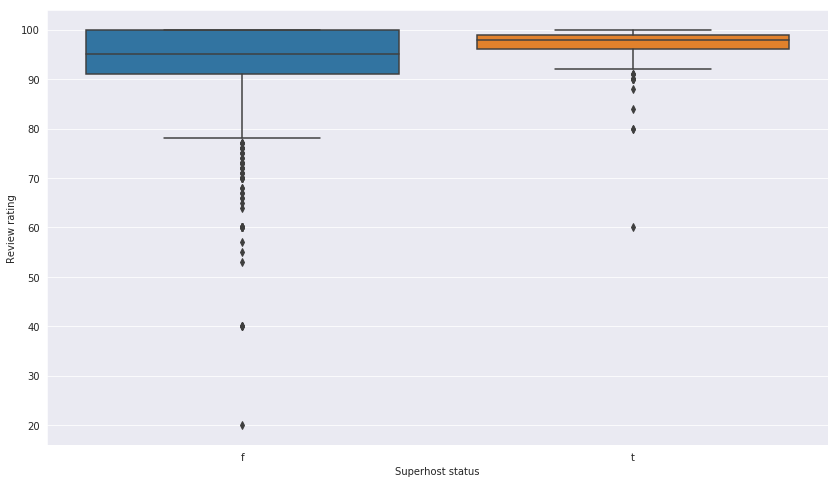

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df)
plt.ylabel('Review rating')
plt.xlabel('Superhost status')
plt.show()

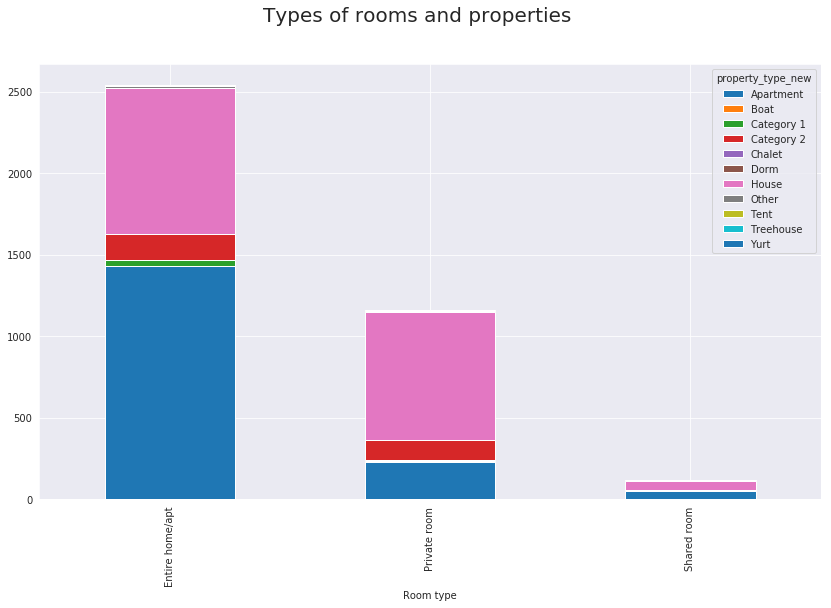

In [20]:
cross('room_type', 'property_type_new', 'Room type', 'Types of rooms and properties')

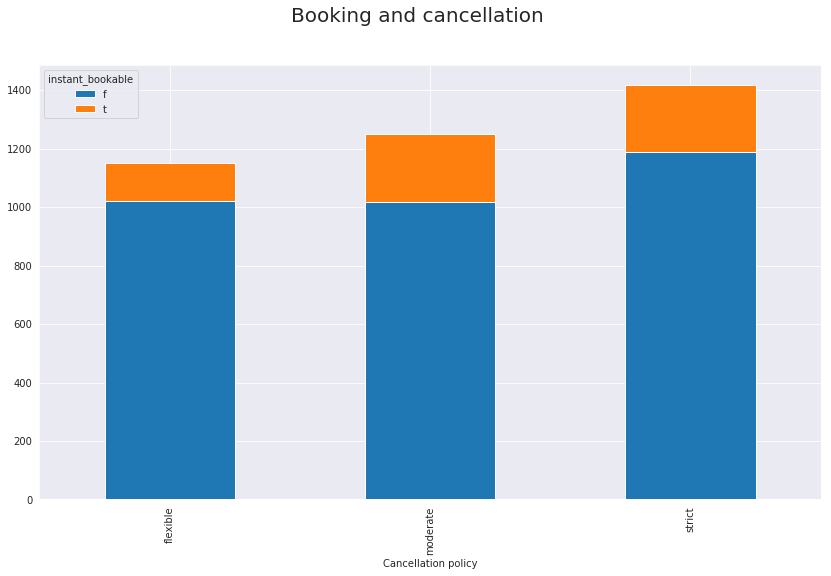

In [21]:
cross('cancellation_policy', 'instant_bookable', 'Cancellation policy', 'Booking and cancellation')

* There is less than twice hosts with status of *superhost*. They are generally evaluated with higher rating. Also looks like fast response is one of the key aspect to get high review rating
* Most common type of room is the entire place followed by private room and shared room at the end. Almost all the time it's apartament or house then we've got category 2 which is something like hostel.
* Only 15% of listings are instant bookable, I suppose that there is possibility to negotiate the price with the host.

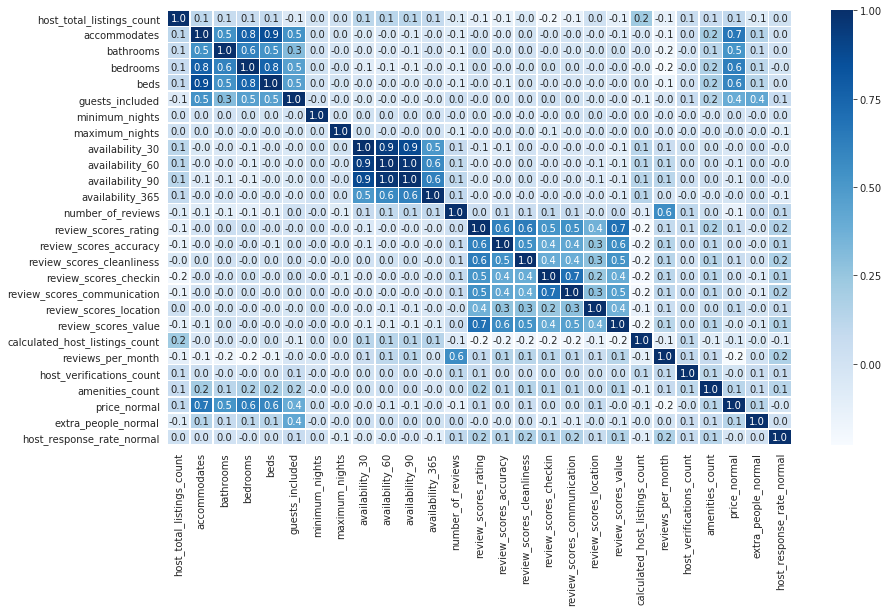

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(df.drop(columns=['id','host_id', 'latitude', 'longitude']).corr(),cmap='Blues', annot=True, fmt='.1f', linewidths=0.5)

* The heatmap shows 4 significant correlated squares.
The first one applies to equipment of the house. Next one is about availability of long term rent. And of course third one shows that different categories of rating are often correlated wich each other. Last one is most important for customers and shows that price is highly correlated with numbers of accomodates, bed, bathrooms and guests included

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



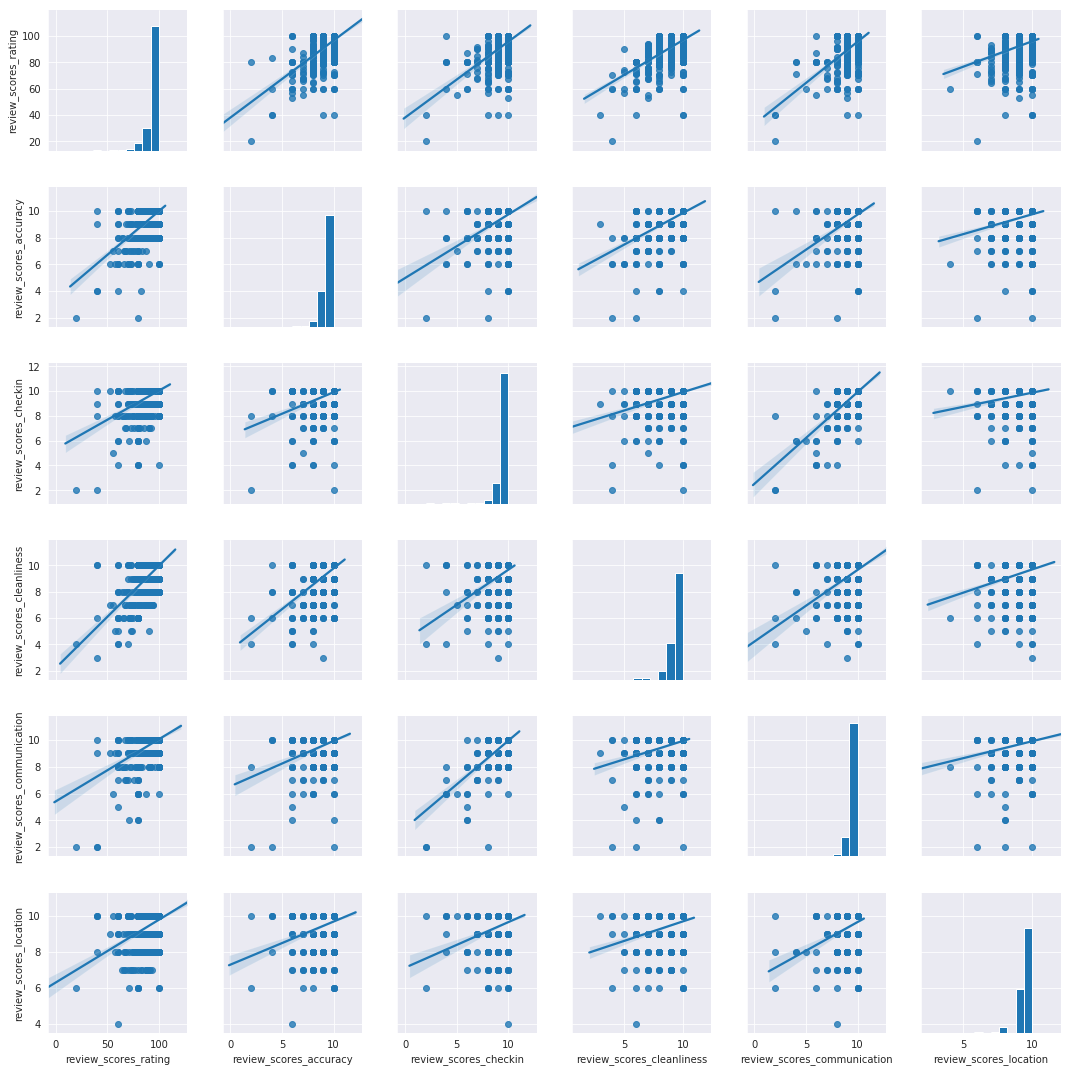

In [23]:
sns.pairplot(x_vars=['review_scores_rating', 'review_scores_accuracy',
                     'review_scores_checkin', 'review_scores_cleanliness',
                     'review_scores_communication', 'review_scores_location'],
             y_vars=['review_scores_rating', 'review_scores_accuracy',
                     'review_scores_checkin', 'review_scores_cleanliness',
                     'review_scores_communication', 'review_scores_location'],
            data=df, kind='reg', diag_kind='hist')

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



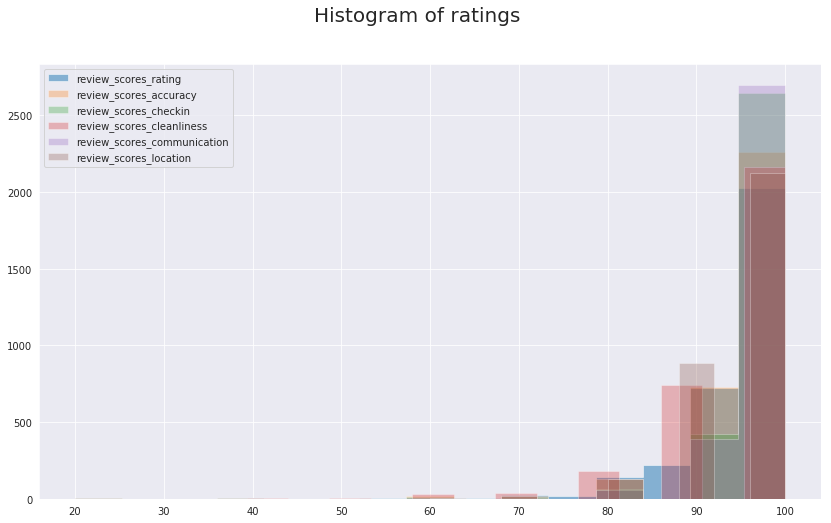

In [24]:
plt.figure(figsize=(14,8))
plt.hist(df['review_scores_rating'], bins=15, histtype='stepfilled', label='review_scores_rating', alpha=0.5)
for p in ['review_scores_accuracy',
          'review_scores_checkin', 'review_scores_cleanliness',
          'review_scores_communication', 'review_scores_location']:
    plt.hist(df[p]*10, bins=15, histtype='stepfilled', label=p, alpha=0.3)
    plt.legend(loc='upper left')
plt.suptitle('Histogram of ratings', fontsize=20)
plt.show()

In [25]:
x=df['beds']
y=df['bedrooms']
z=df['accommodates']


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=df['price_normal'],               
        colorscale='Viridis',   
        opacity=0.8,
        colorbar=dict(
                title='Price'
            ),
        
    ),text=df['price']
)

data = [trace1]
layout = go.Layout(
    scene=dict(
    xaxis=dict(
        title='beds'),
    yaxis=dict(
        title='bedrooms'),
    zaxis=dict(
        title='accommodates')),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

Most of the ratings on AirBNB is pretty high which is quite normal situation. Different kind of ratings are correlated with each other but not always.
Interesting fact which can't be seen on 3D graph is that the most expensive place on the data with the price of 999$ has only 1 bathroom, 1 bedroom and 1 bed.